In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"

# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope

    
channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
probe_data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        probe_data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })
        
probe_df = pd.DataFrame(probe_data)
probe_df 

#for i in range(6):
temp = probe_df[probe_df['group_id']==0]
temp_chs = temp.sort_values('y', ascending=False)
temp_chs['channel_id']

3    19
8     3
0    26
2    20
6     5
5     8
4    14
9     0
7     4
1    25
Name: channel_id, dtype: int64

In [2]:
#@markdown This is an interactive plot of the loaded data, where detected ripples are shown in blue. Data is displayed in chunks of 1 seconds and you can **move forward, backwards or jump to an specific second** using the control bar at the bottom.\
#@markdown \
#@markdown Run this cell to load the plotting method. Execute the **following** cell to use the method.

import matplotlib.pyplot as plt
downsampled_fs=1250
def plot_ripples(data,k):
  data_size = data.shape[0]
  data_dur = data_size / downsampled_fs
  times = np.arange(data_size) / downsampled_fs

  if k >= times[-1]:
    print("Data is only %ds long!"%(times[-1]))
    return
  elif k < 0:
    print("Please introduce a valid integer.")
    return

  ini_idx = int((k-0.1) * downsampled_fs)
  end_idx = np.minimum(int((k+.1) * downsampled_fs), data_size-1)


  pos_mat = list(range(data.shape[1]-1, -1, -1)) * np.ones((end_idx-ini_idx, data.shape[1]))

  fig = plt.figure(figsize=(9.75,5))
  ax = fig.add_subplot(1, 1, 1)

  ax.margins(x=0)
  plt.tight_layout()
  plt.xlabel("Time (s)")


  lines = ax.plot(times[ini_idx:end_idx], data[ini_idx:end_idx, :]*1/np.max(data[ini_idx:end_idx, :], axis=0) + pos_mat, color='k', linewidth=1)

  fills = []
  for pred in pred_indexes:
      if (pred[0] >= ini_idx and pred[0] <= end_idx) or (pred[1] >= ini_idx and pred[1] <= end_idx):
          rip_ini = (pred[0]) / downsampled_fs
          rip_end = (pred[1]) / downsampled_fs
          fill = ax.fill_between([rip_ini, rip_end], [-3, -3], [9, 9], color="tab:blue", alpha=0.3)
          fills.append(fill)

  plt.show()

print("Loaded!")

Loaded!


Q:\sachuriga\Sachuriga_Python\cnn-ripple-main\src\cnn


ValueError: zero-size array to reduction operation maximum which has no identity

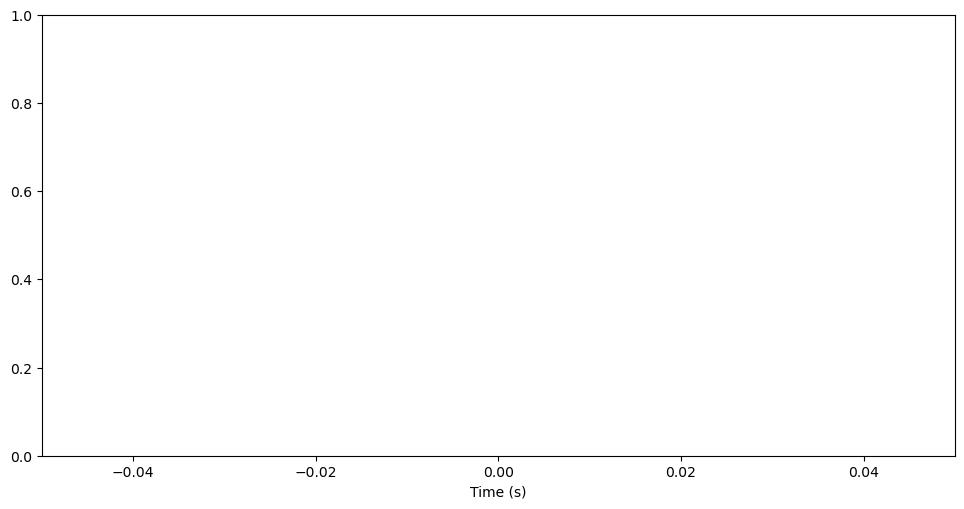

In [ ]:
import sys
%cd Q:\sachuriga\Sachuriga_Python\cnn-ripple-main\src\cnn
from utils import smooth2ripple
from load_data import z_score_normalization, downsample_data

lfp = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/63383/63383_2024-07-25_12-57-40_A_phy_k_manual/lfp_raw.npy")
lfp_time = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/63383/63383_2024-07-25_12-57-40_A_phy_k_manual/lfp_times.npy")
downsampled_fs=1250

chs = temp_chs['channel_id']
group_5 = lfp[:,chs]
group_6=group_5.copy()

#z_group6= z_score_normalization(group_6)
data_smooth = smooth2ripple(group_5)

#data = group_5
pred_indexes=np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/63383/63383_2024-07-25_12-57-40_A_phy_k_manual/pred_indexes.npy")
pred_times = pred_indexes / downsampled_fs

for t in pred_times:
    plot_ripples(data_smooth,t[0])

In [15]:
pred_times

array([[6.4000000e-03, 1.8400000e-02],
       [1.9200000e-02, 3.1200000e-02],
       [2.5600000e-02, 3.7600000e-02],
       ...,
       [1.3053632e+03, 1.3053752e+03],
       [1.3053696e+03, 1.3053816e+03],
       [1.3053760e+03, 1.3053880e+03]])